# PLANTILLA NOTEBOOK DIGITAL LABS ARTIFICIAL INTELLIGENCE


In [114]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 0. CONFIGURACION

In [1]:
# Configuración del analisis
path_data = 'D:/02_PROYECTOS/2_03_SOPRENE/UDC/data/Datos_a_predecir.csv'

In [104]:
# Configuración interna
plt.rcParams["figure.figsize"] = (15,8)

# 1. CARGA DE DATOS

In [12]:
# Carga de datos desde CSV
data_raw = pd.read_csv(path_data)
data_raw

,ColumnValues,DE1.speed,DE1-LUB.after.filter.pressure,DE1-LUB.before.filter.pressure,DE1-LUB.cyl.diff.pressure,DE1-LUB.cyl.pressure,DE1-LUB.diff.pressure,DE1-WAT.raw.water.pressure,ENVIRONMENT.depth,ENVIRONMENT.humidity,...,DE1-TURBO-B2.speed,DE1-WAT.pressure.al.lo.setpoint,DE1-WAT.pressure.al.lolo.setpoint,DE1-WAT.raw.water.pressure.al.lo.setpoint,DE1.junctionbox.speed,DE1.operating,DE1.operations,DE1.serial.speed,DE1-GAS.cyl.temperature.al.lo.setpoint,DE1-FUEL.after.filter.pressure
0,2012-12-31T22:13:52.0,NaN,0.02,0.09,0.02,0.07,0.07,0.01,22.200001,76.199997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-12-31T22:14:02.0,NaN,NaN,0.05,-0.02,0.06,0.03,0.02,23.600000,76.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-12-31T22:14:12.0,NaN,0.02,0.04,-0.04,0.07,0.02,0.01,18.799999,76.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-12-31T22:14:22.0,NaN,0.03,0.10,0.02,NaN,0.06,NaN,22.200001,76.300003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-12-31T22:14:32.0,NaN,0.02,0.04,-0.03,NaN,0.02,0.01,29.000000,76.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012-12-31T22:14:42.0,NaN,0.03,0.05,-0.02,NaN,NaN,0.00,30.000000,76.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012-12-31T22:14:52.0,NaN,0.02,0.03,-0.03,0.07,0.02,0.01,28.000000,76.599998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2012-12-31T22:15:02.0,NaN,0.03,0.06,0.01,0.08,0.06,0.00,30.400000,76.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012-12-31T22:15:12.0,NaN,0.03,0.06,-0.02,0.07,0.02,0.01,24.600000,76.800003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012-12-31T22:15:22.0,NaN,0.02,0.04,-0.03,NaN,0.02,0.01,23.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. PROCESAMIENTO

## 2.1. Limpieza

In [8]:
data_processed = copy.deepcopy(data_raw)

In [9]:
# Transformar la referencia de tiempo a tiempo absoluto y asignar como indice
data_processed['timestamp'] = pd.to_datetime(data_processed[data_processed.columns[0]]) #pd.to_datetime(data_processed['timestamp'], unit = 's')
data_processed.set_index(data_processed['timestamp'], inplace = True)
data_processed.drop('ColumnValues', axis = 1, inplace = True)
data_processed.drop('timestamp', axis = 1, inplace = True)

In [10]:
# Analizar columnas vacias
data_processed.dropna(axis = 1, how = 'all', inplace = True)

In [14]:
# Rellenar columnas
data_processed.fillna(method = 'ffill', limit = 500, inplace = True)
data_processed.fillna(method = 'bfill', limit = 500, inplace = True)

In [15]:
# Quitar columnas que no esten completas o que sean constantes
data_processed.dropna(axis = 1, how = 'any', inplace = True)
data_processed = data_processed.loc[:, data_processed.apply(pd.Series.nunique) != 1]

In [119]:
data_processed

,DE1.speed,DE1-LUB.after.filter.pressure,DE1-LUB.before.filter.pressure,DE1-LUB.cyl.diff.pressure,DE1-LUB.cyl.pressure,DE1-LUB.diff.pressure,DE1-WAT.raw.water.pressure,DE1-WAT.pressure,DE1.start.air.pressure,DE1.control.air.pressure,...,DE1-TURBO-A1.speed,DE1-TURBO-A2.speed,DE1-TURBO-B1.speed,DE1-TURBO-B2.speed,DE1-WAT.pressure.al.lo.setpoint,DE1-WAT.pressure.al.lolo.setpoint,DE1-WAT.raw.water.pressure.al.lo.setpoint,DE1.junctionbox.speed,DE1.serial.speed,DE1-GAS.cyl.temperature.al.lo.setpoint
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-12-31 22:13:52,0.0,0.02,0.09,0.02,0.07,0.07,0.01,0.39,32.200001,6.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:14:02,0.0,0.02,0.05,-0.02,0.06,0.03,0.02,0.39,32.200001,6.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:14:12,0.0,0.02,0.04,-0.04,0.07,0.02,0.01,0.40,32.500000,6.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:14:22,0.0,0.03,0.10,0.02,0.07,0.06,0.01,0.39,32.799999,6.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:14:32,0.0,0.02,0.04,-0.03,0.07,0.02,0.01,0.40,33.200001,6.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:14:42,0.0,0.03,0.05,-0.02,0.07,0.02,0.00,0.39,33.599998,6.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:14:52,0.0,0.02,0.03,-0.03,0.07,0.02,0.01,0.39,33.799999,6.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:15:02,0.0,0.03,0.06,0.01,0.08,0.06,0.00,0.39,34.099998,6.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-12-31 22:15:12,0.0,0.03,0.06,-0.02,0.07,0.02,0.01,0.40,34.500000,6.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 2.2. Extracción de características

In [96]:
# Resamplear
data_processed_hour = data_processed.resample('H').mean()
data_processed_day = data_processed.resample('D').mean()
data_processed_week = data_processed.resample('W').mean()
data_processed_month = data_processed.resample('M').mean()

# 3. ANALISIS

In [126]:
data_processed.describe()

,DE1.speed,DE1-LUB.after.filter.pressure,DE1-LUB.before.filter.pressure,DE1-LUB.cyl.diff.pressure,DE1-LUB.cyl.pressure,DE1-LUB.diff.pressure,DE1-WAT.raw.water.pressure,DE1-WAT.pressure,DE1.start.air.pressure,DE1.control.air.pressure,...,DE1-TURBO-A1.speed,DE1-TURBO-A2.speed,DE1-TURBO-B1.speed,DE1-TURBO-B2.speed,DE1-WAT.pressure.al.lo.setpoint,DE1-WAT.pressure.al.lolo.setpoint,DE1-WAT.raw.water.pressure.al.lo.setpoint,DE1.junctionbox.speed,DE1.serial.speed,DE1-GAS.cyl.temperature.al.lo.setpoint
count,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,...,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000,471903.000000
mean,225.618962,1.904698,2.046245,0.214201,1.830958,0.142357,0.383270,0.638809,28.348257,6.178289,...,9.211358,9.146114,1.752134,0.067615,0.206328,0.158024,0.130694,225.185964,225.618962,114.036598
std,359.059421,2.919924,3.117337,0.354532,2.770531,0.256927,0.627998,0.486606,15.759074,0.224473,...,15.086503,14.971398,7.624994,1.460370,0.349395,0.267534,0.226309,356.834432,359.059421,185.296931
min,0.000000,0.000000,0.000000,-0.310000,0.000000,-1.210000,0.000000,0.260000,0.000000,4.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030000,0.040000,-0.020000,0.060000,0.010000,0.000000,0.340000,32.500000,5.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.040000,0.070000,0.000000,0.070000,0.040000,0.010000,0.360000,36.000000,6.270000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,645.000000,6.120000,6.400000,0.600000,5.630000,0.220000,0.860000,0.980000,38.500000,6.360000,...,24.700001,24.600000,0.000000,0.000000,0.440000,0.340000,0.260000,642.000000,645.000000,371.500000
max,1235.000000,7.760000,14.070000,3.550000,10.520000,9.280000,3.260000,3.770000,41.700001,6.640000,...,44.349998,43.900002,44.049999,44.400002,2.000000,1.700000,1.490000,1228.000000,1235.000000,597.000000


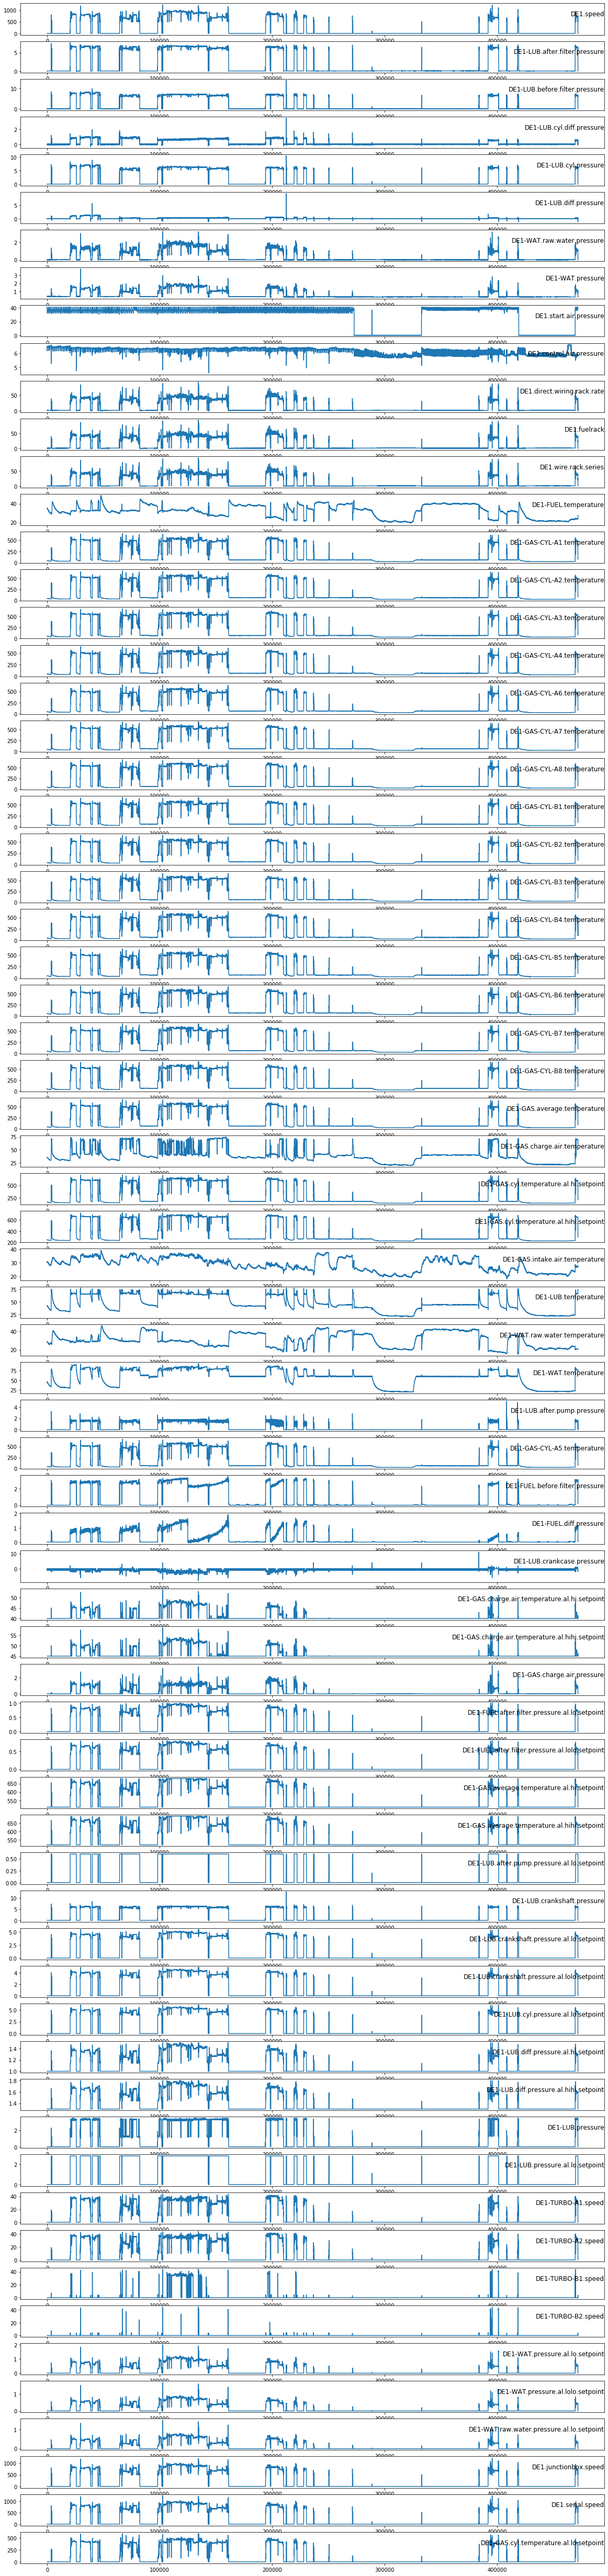

In [39]:
# Observar los datos
plt.figure()

for column in range(0, len(data_processed.columns)):
    
    plt.subplot(len(data_processed.columns), 1, column+1)
    plt.plot(data_processed[data_processed.columns[column]].values)
    plt.title(data_processed.columns[column], y = 0.5, loc = 'right')
    
plt.show()

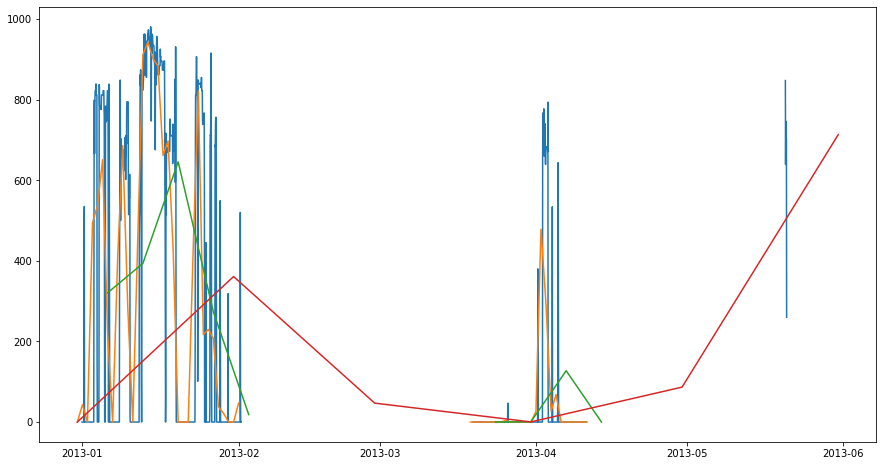

In [107]:
# Pintar versiones compactadas de una variable
plt.plot(data_processed_hour[data_processed.columns[0]])
plt.plot(data_processed_day[data_processed.columns[0]])
plt.plot(data_processed_week[data_processed.columns[0]])
plt.plot(data_processed_month[data_processed.columns[0]])

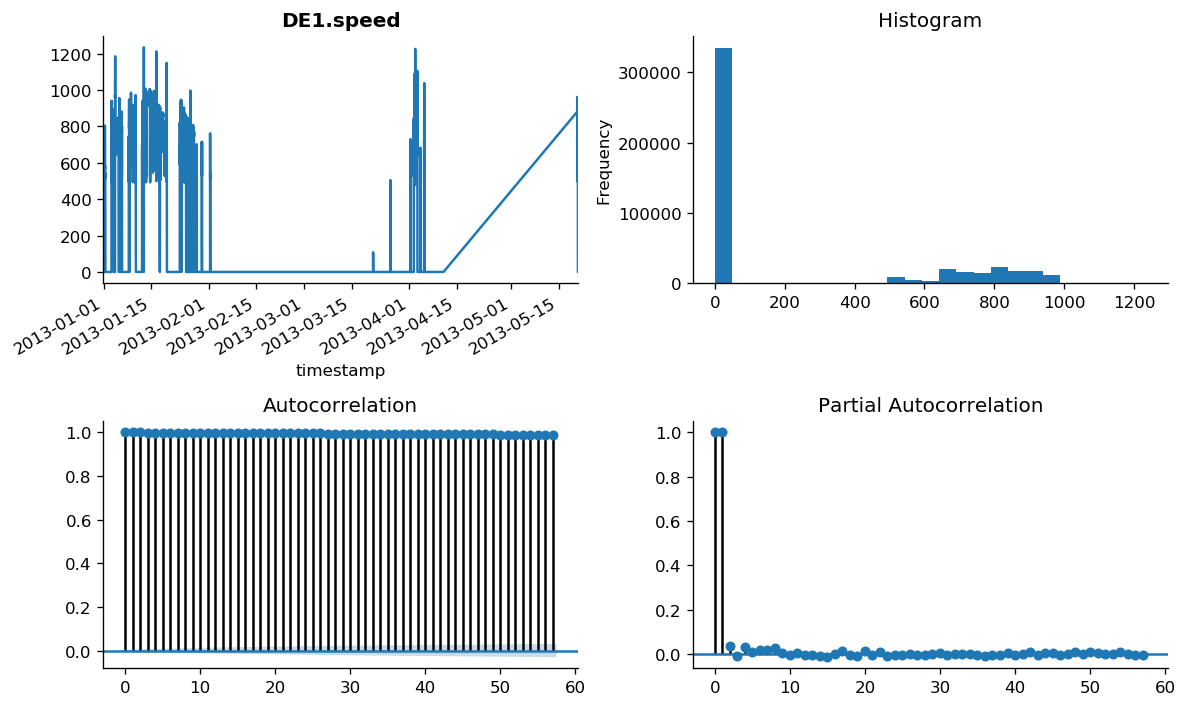

(<matplotlib.axes._subplots.AxesSubplot at 0x2118ddf35c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2118de99278>)

In [129]:
import statsmodels.api as sm

def tsplot(y, title, lags=None, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax

tsplot(data_processed[data_processed.columns[0]], data_processed.columns[0])

In [118]:
# Analizar normalidad de las series
def analizar_normalidad(data, alpha = 0.05):
    
    # Cara cada variable
    for column in data.columns:
        stat, p = stats.normaltest(data[column])
    
        if p > alpha:
            print('Variable ' + str(column) + '(p = ' + str(p) + '): GAUSSIANA')
        else:
            print('Variable ' + str(column) + ': NO gaussiana')

# Analizar
analizar_normalidad(data_processed)

Variable DE1.speed: NO gaussiana
Variable DE1-LUB.after.filter.pressure: NO gaussiana
Variable DE1-LUB.before.filter.pressure: NO gaussiana
Variable DE1-LUB.cyl.diff.pressure: NO gaussiana
Variable DE1-LUB.cyl.pressure: NO gaussiana
Variable DE1-LUB.diff.pressure: NO gaussiana
Variable DE1-WAT.raw.water.pressure: NO gaussiana
Variable DE1-WAT.pressure: NO gaussiana
Variable DE1.start.air.pressure: NO gaussiana
Variable DE1.control.air.pressure: NO gaussiana
Variable DE1.direct.wiring.rack.rate: NO gaussiana
Variable DE1.fuelrack: NO gaussiana
Variable DE1.wire.rack.series: NO gaussiana
Variable DE1-FUEL.temperature: NO gaussiana
Variable DE1-GAS-CYL-A1.temperature: NO gaussiana
Variable DE1-GAS-CYL-A2.temperature: NO gaussiana
Variable DE1-GAS-CYL-A3.temperature: NO gaussiana
Variable DE1-GAS-CYL-A4.temperature: NO gaussiana
Variable DE1-GAS-CYL-A6.temperature: NO gaussiana
Variable DE1-GAS-CYL-A7.temperature: NO gaussiana
Variable DE1-GAS-CYL-A8.temperature: NO gaussiana
Variable DE1-

In [ ]:
# Analisis de estacionaridad
# - Hipotesis nula (H0): La serie NO es estacionaria (su media y varianza cambian a lo largo del tiempo -> tiene dependencia temporal). Si p > 0.05, es cierto
# - Hipotesis alternativa (H1): La serie es estacionaria (tiene media y varianza constante a lo largo del tiempo --> es independiente temporalmente). Si p < 0.05, es cierto
def analizar_seriesestacionaria(data):
    
    # Cara cada variable
    for column in data.columns:
        
        # Pintar media y std deslizante
        data_rolmean = data[column].rolling(window = 30).mean()
        data_rolstd = data[column].rolling(window = 30).std()

        # Dickey-Fuller Test
        df_test = adfuller(data[column], autolag = 'AIC')
        df_test_output = pd.Series(df_test[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key, value in df_test[4].items():
            df_test_output['Critical Value (%s)'%key] = value

        print(df_test_output)
    
# Comprobar si cada uno de los parametros son estacionarios o no
analizar_seriesestacionaria(data_processed)

In [154]:
# Test de Granger: Comprueba si los resultados de una variable A sirven para predecir a otra variable B (unidireccional o bidireccionalmente).
# - Hipotesis nula (H0): Los coeficientes referidos a valores pasados son nulos (Con la situacion actual no se puede estimar el futuro). Si p < 0.05, es falso
def analizar_causalidadgranger(data, test = 'ssr_chi2test', verbose = False):    
    
    df = pd.DataFrame(np.zeros((len(data.columns), len(data.columns))), columns = data.columns, index = data.columns)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

analizar_causalidadgranger(data_processed)     

C:\Users\dsmunoz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\dsmunoz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\dsmunoz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\dsmunoz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 1
  'rank is %d' % (J, J_), Val

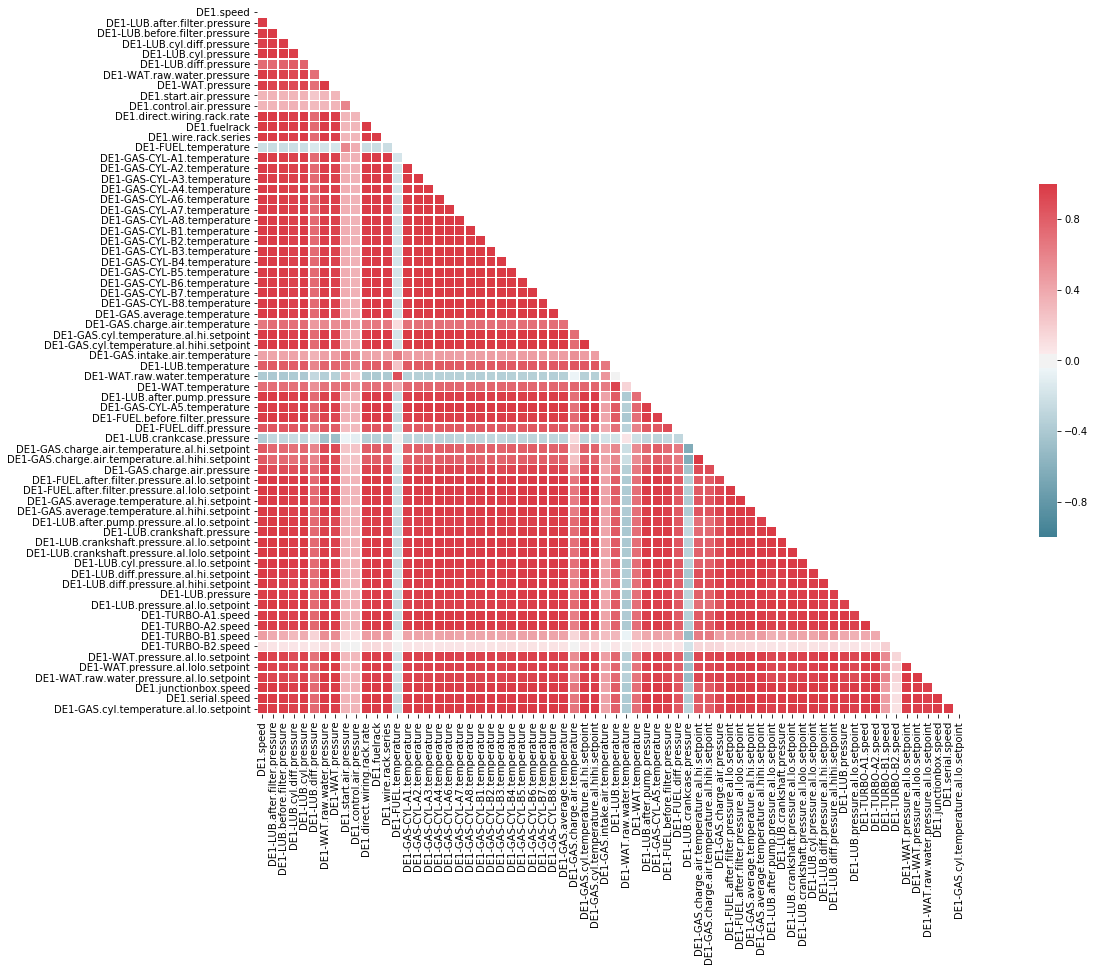

In [94]:
# Analizar correlacion
def analizar_correlacion(data):
    
    # Analizar correlacio
    corr = data.corr()

    # Filtrar triangulo
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Definir figura
    f, ax = plt.subplots(figsize = (27, 13))

    # Definir paleta de colores
    color_map = sns.diverging_palette(220, 10, as_cmap=True)

    # Pintar matriz de correlacion
    sns.heatmap(corr, mask = mask, cmap = color_map, vmax = 1, vmin = -1, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
    
analizar_correlacion(data_processed)

In [ ]:
def analizar_composicionserietemporal(data):
    
    # Cara cada variable
    for column in data.columns:
    
        # Descomponer
        decomposition = seasonal_decompose(data[data.columns[column]])
        trend         = decomposition.trend
        seasonal      = decomposition.seasonal
        residual      = decomposition.resid

        plt.subplot(411)
        plt.plot(data[data.columns[column]], label = 'Original')
        plt.legend(loc='best')
        plt.subplot(412)
        plt.plot(trend, label = 'Trend')
        plt.legend(loc='best')
        plt.subplot(413)
        plt.plot(seasonal,label = 'Estacionalidad')
        plt.legend(loc='best')
        plt.subplot(414)
        plt.plot(residual, label = 'Residuals')
        plt.legend(loc='best')
        plt.tight_layout()

# 4. MODELADO

## 4.1. Preparacion de los datos

In [40]:
# Dividir temporalmente en train, test y validacion
data_train      = data_processed[:int(len(data_processed) * 0.7)]
data_validation = data_processed[int(len(data_processed) * 0.7):int(len(data_processed) * 0.85)]
data_test       = data_processed[int(len(data_processed) * 0.85):]

In [42]:
# Escalado
scaler                               = MinMaxScaler(feature_range = (0, 1))
data_train_scaled                    = pd.DataFrame(scaler.fit_transform(copy.deepcopy(data_train)))
data_validation_scaled               = pd.DataFrame(scaler.fit_transform(copy.deepcopy(data_validation)))

In [57]:
data_train_scaled.index = data_train.index
data_train_scaled.columns = data_train.columns

In [58]:
data_train_scaled

,DE1.speed,DE1-LUB.after.filter.pressure,DE1-LUB.before.filter.pressure,DE1-LUB.cyl.diff.pressure,DE1-LUB.cyl.pressure,DE1-LUB.diff.pressure,DE1-WAT.raw.water.pressure,DE1-WAT.pressure,DE1.start.air.pressure,DE1.control.air.pressure,...,DE1-TURBO-A1.speed,DE1-TURBO-A2.speed,DE1-TURBO-B1.speed,DE1-TURBO-B2.speed,DE1-WAT.pressure.al.lo.setpoint,DE1-WAT.pressure.al.lolo.setpoint,DE1-WAT.raw.water.pressure.al.lo.setpoint,DE1.junctionbox.speed,DE1.serial.speed,DE1-GAS.cyl.temperature.al.lo.setpoint
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-12-31 22:13:52,0.0,0.002577,0.006397,0.085492,0.006654,0.122021,0.003067,0.037037,0.772182,0.955224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:14:02,0.0,0.002577,0.003554,0.075130,0.005703,0.118208,0.006135,0.037037,0.772182,0.955224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:14:12,0.0,0.002577,0.002843,0.069948,0.006654,0.117255,0.003067,0.039886,0.779376,0.955224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:14:22,0.0,0.003866,0.007107,0.085492,0.006654,0.121068,0.003067,0.037037,0.786571,0.945274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:14:32,0.0,0.002577,0.002843,0.072539,0.006654,0.117255,0.003067,0.039886,0.796163,0.940298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:14:42,0.0,0.003866,0.003554,0.075130,0.006654,0.117255,0.000000,0.037037,0.805755,0.925373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:14:52,0.0,0.002577,0.002132,0.072539,0.006654,0.117255,0.003067,0.037037,0.810552,0.910448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:15:02,0.0,0.003866,0.004264,0.082902,0.007605,0.121068,0.000000,0.037037,0.817746,0.895522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-31 22:15:12,0.0,0.003866,0.004264,0.075130,0.006654,0.117255,0.003067,0.039886,0.827338,0.875622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
fecha_actual = data_train_scaled.index[0]
#fecha_actual + timedelta(minutes = 10)

x = []
data_train_scaled.loc[fecha_actual]

DE1.speed                                          0.000000
DE1-LUB.after.filter.pressure                      0.002577
DE1-LUB.before.filter.pressure                     0.006397
DE1-LUB.cyl.diff.pressure                          0.085492
DE1-LUB.cyl.pressure                               0.006654
DE1-LUB.diff.pressure                              0.122021
DE1-WAT.raw.water.pressure                         0.003067
DE1-WAT.pressure                                   0.037037
DE1.start.air.pressure                             0.772182
DE1.control.air.pressure                           0.955224
DE1.direct.wiring.rack.rate                        0.012973
DE1.fuelrack                                       0.010616
DE1.wire.rack.series                               0.009564
DE1-FUEL.temperature                               0.536082
DE1-GAS-CYL-A1.temperature                         0.037480
DE1-GAS-CYL-A2.temperature                         0.038103
DE1-GAS-CYL-A3.temperature              

## 4.2. Definicion del modelo

## 4.3. Entrenamiento

## 4.4. Test

In [153]:
from datetime import timedelta

prediction_horizon = [7, 15, 30]

# El punto inicial, es la primera fecha más el mayor valor de predicción
date_actual = df_aux.index[0] + timedelta(days = max(prediction_horizon))
df_aux.iloc[df.index.get_loc(date_actual - timedelta(days = 5), method = 'nearest')]


0.003865979181004546

# 5. RESULTADOS

AttributeError: 'numpy.ndarray' object has no attribute 'diff'

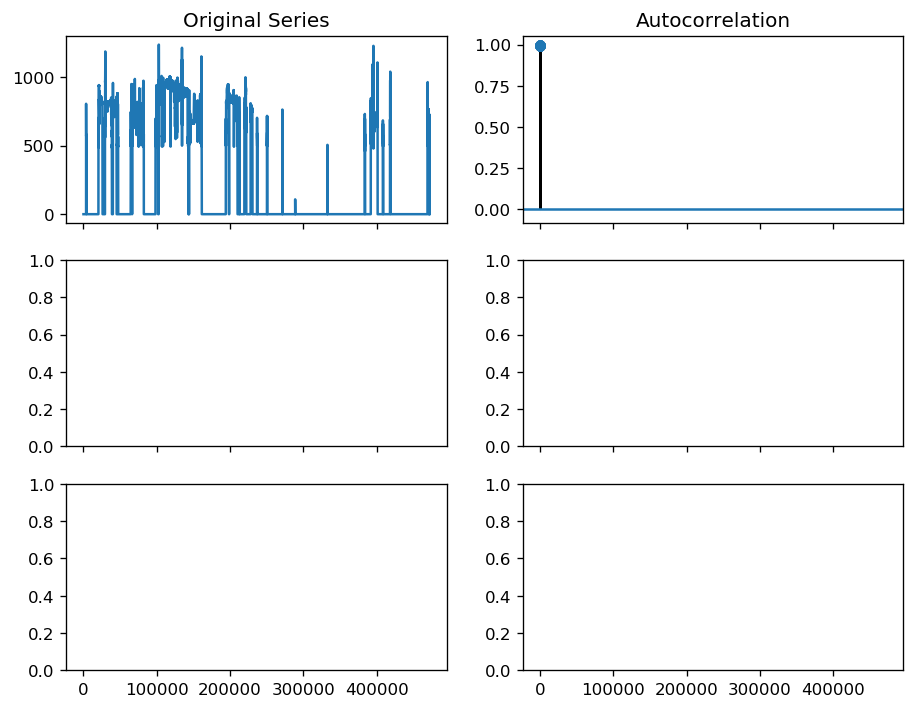

In [125]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = copy.deepcopy(data_processed[data_processed.columns[0]])

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
plot_acf(df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.values.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.values.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.values.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.values.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

# PLANTILLA NOTEBOOK DIGITAL LABS - ARTIFICIAL INTELLIGENCE 
Last update: 2020-06-25